# Required Lab -- week of March 19th -- 23rd

Make an animated plot in matplotlib that recreates an analogue clock. 

Make the minute and hour markers in black.  Put numbers (text field) at the hour markers.  Make the hour hand short and fat, the minute hand long and thin, both in black.  Make the second hand in red. 

Set the time on your clock to local time -- use the **time** library. 

Make both a (normal) 12-hour version of your clock, and a 24-hour version. 

In [1]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time as ti 

In [2]:
ti.localtime().tm_hour, ti.localtime().tm_min, ti.localtime().tm_sec

(18, 48, 49)

<IPython.core.display.Javascript object>


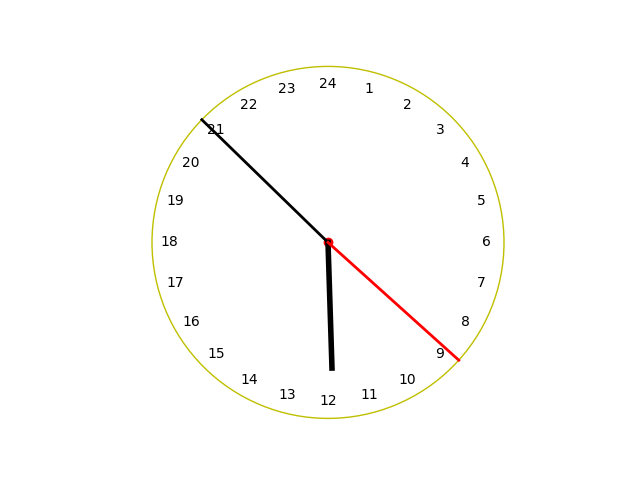

In [8]:

fig, ax = plt.subplots()

## initial plot. bearing, initial arm, circle of radius 1.

circ = plt.Circle( (0.0, 0.0), 1.0, color='y', fill=False)
cent = plt.plot([0.0], [0.0], 'ro')
ax.add_artist(circ)
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
ax.set_aspect("equal")
ax.axis('off')


TH = 0.0
TM = 0.0
TS = 0.0

arm_hour, = plt.plot([0.0, np.sin(TH)], [0.0, -np.cos(TH)], 'black', lw = 4)
arm_min, = plt.plot([0.0, np.sin(TM)], [0.0, -np.cos(TM)], 'black', lw = 2)
arm_sec, = plt.plot([0.0, np.sin(TS)], [0.0, -np.cos(TS)], 'red', lw = 2)


for i in range(1,25):
    num_theta = np.pi/2 - (np.pi/12)*i
    ax.text(0.9*np.cos(num_theta), 0.9*np.sin(num_theta), i, ha = 'center', va = 'center')

def init():
    update();
    return [arm_hour, arm_min, arm_sec]

def update():
    now = ti.localtime()
    hour = float((now.tm_hour-7)/2) + now.tm_min/60.0/2 + now.tm_sec/(60.0*60.0)/2;
    mins = now.tm_min + now.tm_sec/60.0/2;
    secs = float(now.tm_sec/2)
    
    TH = np.pi -(2*np.pi/12)*hour
    TM = np.pi -(2*np.pi/60)*mins
    TS = np.pi -(2*np.pi/60)*secs
    
    #get local time, convert hours and mins to angles
    
    arm_hour.set_xdata( [0.0, 5*np.sin(TH)/7] )
    arm_hour.set_ydata( [0.0, -5*np.cos(TH)/7] )
    
    arm_min.set_xdata([0.0, np.sin(TM)])
    arm_min.set_ydata([0.0, -np.cos(TM)])
    
    arm_sec.set_xdata([0.0, np.sin(TS)])
    arm_sec.set_ydata([0.0, -np.cos(TS)])
    

def animate(i):
    update()
    return [arm_hour, arm_min, arm_sec]

## interval is ms delay between frames
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=1000, blit=True)

plt.show()

<IPython.core.display.Javascript object>


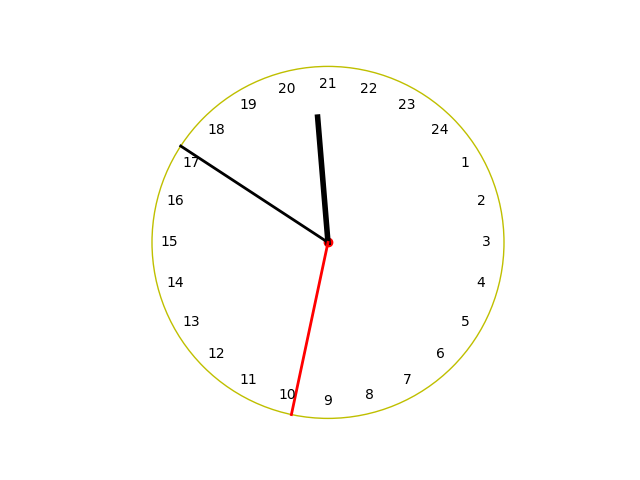